## Murder Data Analysis

In [20]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Spatial Plotting
shapeFile = gpd.read_file('../Data/spatial-files/India States/Indian_States.shp')
shapeFile

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [6]:
data = pd.read_csv("../Data/murder(2016-2021)/STATE-UT wise murder data(2021-2015).csv")
data

,Unnamed: 0,Sl. No.,State/UT,2015,2016,2017,2018,2019,2020,2021
0,0,1,Andhra Pradesh,1144,1123.0,1054.0,935.0,870.0,853,956
1,1,2,Arunachal Pradesh,61,46.0,79.0,62.0,60.0,45,49
2,2,3,Assam,1352,1149.0,1144.0,1241.0,1235.0,1131,1192
3,3,4,Bihar,3183,2581.0,2803.0,2934.0,3138.0,3150,2799
4,4,5,Chhattisgarh,959,957.0,919.0,917.0,913.0,972,1007
5,5,6,Goa,35,30.0,31.0,29.0,33.0,34,26
6,6,7,Gujarat,1228,1120.0,970.0,1072.0,993.0,982,1010
7,7,8,Haryana,1024,1057.0,1046.0,1104.0,1137.0,1143,1112
8,8,9,Himachal Pradesh,109,101.0,99.0,99.0,70.0,91,86
9,9,10,Jharkhand,1551,1514.0,1487.0,1712.0,1626.0,1592,1573


In [10]:
data.drop([28,37],axis='index',inplace=True)

KeyError: '[28, 37] not found in axis'

In [15]:
data.drop("Unnamed: 0",axis='columns',inplace=True)

In [17]:
data.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
data.replace(to_replace='Delhi',value='NCT of Delhi',inplace=True)
data.replace(to_replace='Andaman and Nicobar Islands',value='Andaman & Nicobar Island',inplace=True)
data.replace(to_replace='Jammu and Kashmir',value='Jammu & Kashmir',inplace=True)

In [18]:
merge =shapeFile.set_index('st_nm').join(data.set_index('State/UT'))
merge

,geometry,Sl. No.,2015,2016,2017,2018,2019,2020,2021
st_nm,,,,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",29,19.0,14.0,9.0,11.0,13.0,5.0,16.0
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2,61.0,46.0,79.0,62.0,60.0,45.0,49.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",3,1352.0,1149.0,1144.0,1241.0,1235.0,1131.0,1192.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",4,3183.0,2581.0,2803.0,2934.0,3138.0,3150.0,2799.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",30,24.0,26.0,25.0,20.0,26.0,22.0,17.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",5,959.0,957.0,919.0,917.0,913.0,972.0,1007.0
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",6,35.0,30.0,31.0,29.0,33.0,34.0,26.0


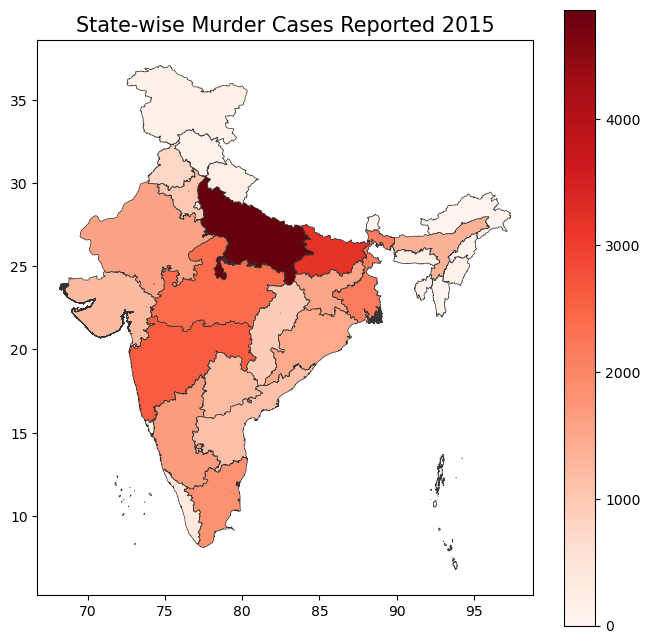

In [52]:
fig,axes=plt.subplots(1 ,figsize=(8,8))


axes.set_title('State-wise Murder Cases Reported 2015',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2015', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

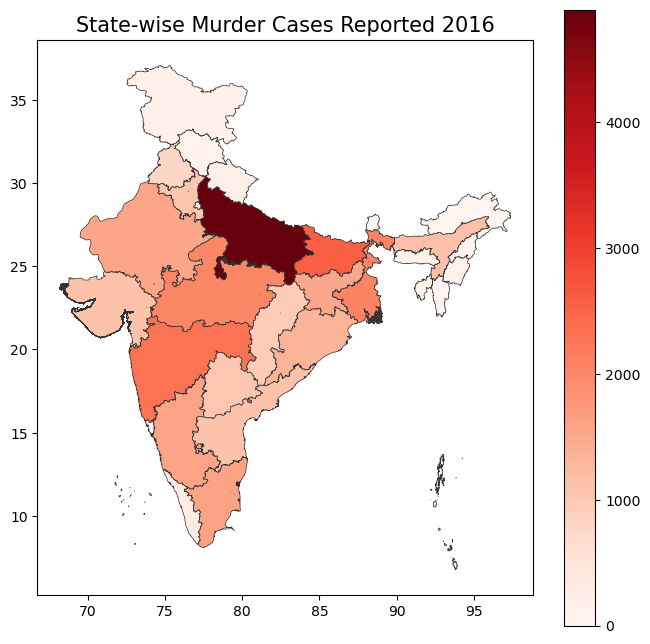

In [56]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2016',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2016', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

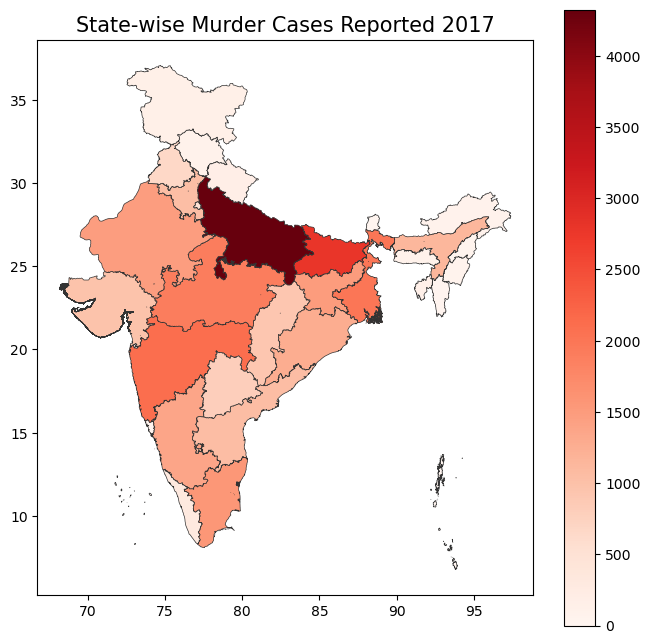

In [57]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2017',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2017', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

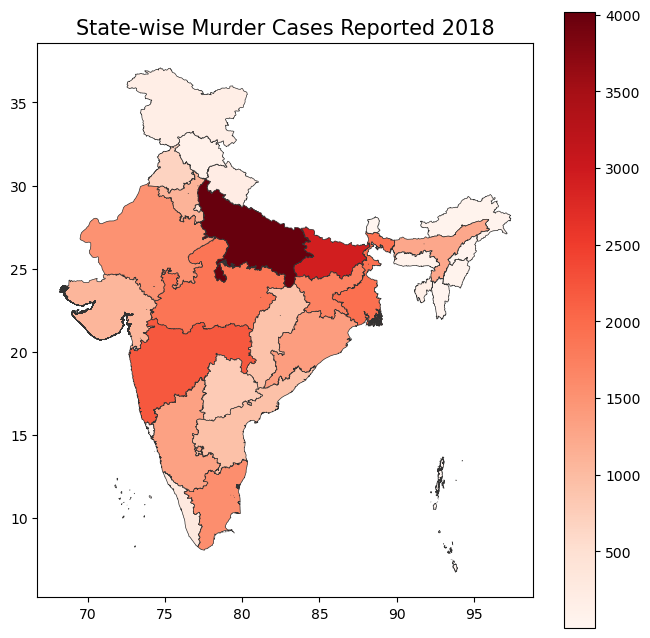

In [58]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2018',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2018', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

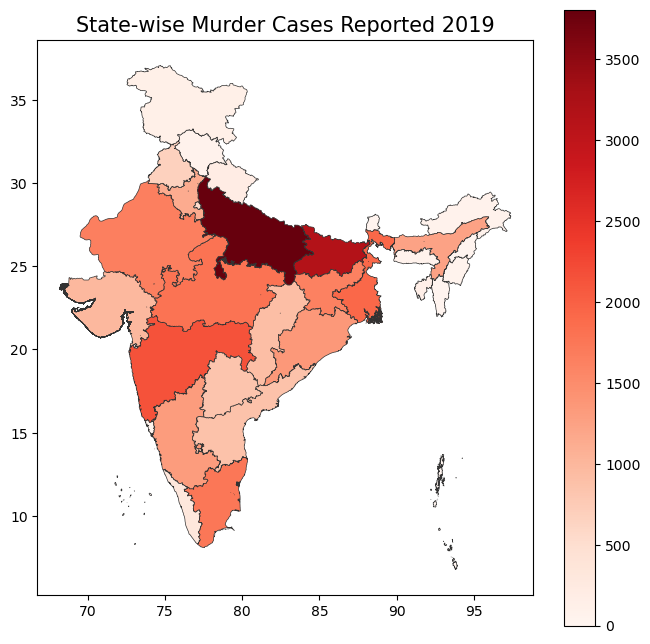

In [59]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2019',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2019', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

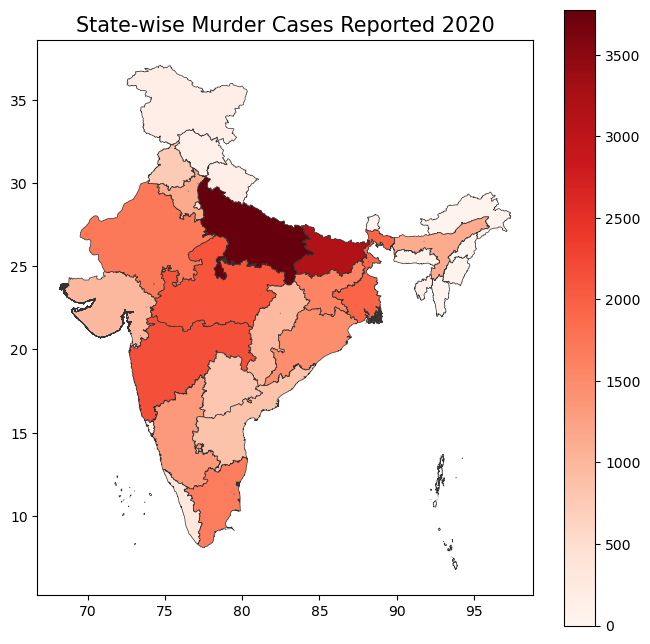

In [60]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2020',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2020', cmap='Reds', linewidth=0.5, ax=axes, edgecolor='0.2',legend=True)

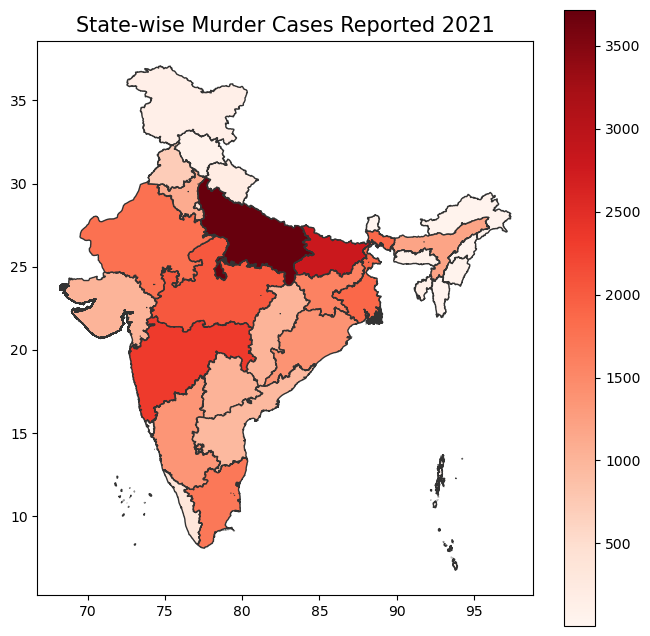

In [61]:
fig,axes=plt.subplots(1 ,figsize=(8,8))
axes.set_title('State-wise Murder Cases Reported 2021',
             fontdict={'fontsize': '15','weight': 'normal'})
fig = merge.plot(column='2021', cmap='Reds', ax=axes, edgecolor='0.2',legend=True)